In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import re


### Life_expectancy_dataset.csv

In [2]:
#считывание файла
life_df = pd.read_csv(r'C:\Users\skills\Downloads\Stud-IT_module_1\training_datasets\Life_expectancy_dataset.csv')
life_df

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,"Macau, China",84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219;Gabon;52.1;51.6;52.5;Africa,NaN,NaN,NaN,NaN,NaN
219,220;Swaziland;51.6;52.2;51;Africa,NaN,NaN,NaN,NaN,NaN
220,221;Afghanistan;51.3;49.9;52.7;Asia,NaN,NaN,NaN,NaN,NaN
221,222;Guinea-Bissau;50.6;48.6;52.7;Africa,NaN,NaN,NaN,NaN,NaN


In [3]:
# Инициализация списка для хранения данных
data = []

# Чтение файла построчно
with open(r'C:\Users\skills\Downloads\Stud-IT_module_1\training_datasets\Life_expectancy_dataset.csv', 'r') as file:
    for line in file:
        if ';' in line:
            # Если строка содержит ';', используем его как разделитель
            data.append(line.strip().split(';'))
        else:
            # В противном случае используем ',' как разделитель
            data.append(line.strip().split(','))

# Преобразуем список в DataFrame
life_df = pd.DataFrame(data)

# Проверка результата
life_df

,0,1,2,3,4,5,6
0,Rank,Country,Overall Life,Male Life,Female Life,Continent,None
1,1,Monaco,89.5,85.6,93.5,Europe,None
2,2,Japan,85,81.7,88.5,Asia,None
3,3,Singapore,85,82.3,87.8,Asia,None
4,4,"""Macau","China""",84.5,81.6,87.6,Asia
...,...,...,...,...,...,...,...
219,219,Gabon,52.1,51.6,52.5,Africa,None
220,220,Swaziland,51.6,52.2,51,Africa,None
221,221,Afghanistan,51.3,49.9,52.7,Asia,None
222,222,Guinea-Bissau,50.6,48.6,52.7,Africa,None


In [4]:
# назначаем новые названия столбцов
life_df.columns = life_df.iloc[0]

# удаляем первую строку и сбрасываем индекс
life_df = life_df.drop(0).reset_index(drop=True)

life_df

,Rank,Country,Overall Life,Male Life,Female Life,Continent,None
0,1,Monaco,89.5,85.6,93.5,Europe,None
1,2,Japan,85,81.7,88.5,Asia,None
2,3,Singapore,85,82.3,87.8,Asia,None
3,4,"""Macau","China""",84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe,None
...,...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa,None
219,220,Swaziland,51.6,52.2,51,Africa,None
220,221,Afghanistan,51.3,49.9,52.7,Asia,None
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa,None


In [5]:
life_df.columns

Index([        'Rank',      'Country', 'Overall Life',    'Male Life',
        'Female Life',    'Continent',           None],
      dtype='object', name=0)

In [6]:
#ищем сломанные строки
life = life_df[None].dropna()
life = life.to_frame(name=None)
life

,None
3,Asia
6,Asia
19,Europe
44,Africa
63,Oceania


In [7]:
#получаем индексы сломанных строк
strings = life.index
strings

Index([3, 6, 19, 44, 63], dtype='int64')

In [8]:
#ищем сами сломанные строки
Filter_df = life_df[life_df.index.isin(strings)]
Filter_df

,Rank,Country,Overall Life,Male Life,Female Life,Continent,None
3,4,"""Macau","China""",84.5,81.6,87.6,Asia
6,7,"""Hong Kong","China""",82.9,80.3,85.8,Asia
19,20,"""France","metropolitan""",81.8,78.7,85.1,Europe
44,45,"""Saint Helena","Ascension and Tristan da Cunha""",79.5,76.6,82.6,Africa
63,64,"""Northern Mariana Islands","US""",78,75.3,80.8,Oceania


In [9]:
#сдвиг столбцов
Filter_df ['Cont'] = Filter_df['Country'] + ',' + Filter_df['Overall Life']
Filter_df ['Overall'] = Filter_df['Male Life']
Filter_df ['Male'] = Filter_df['Female Life']
Filter_df ['Female'] = Filter_df['Continent']
Filter_df ['Co'] = Filter_df[None]
Filter_df

C:\Users\skills\AppData\Local\Temp\ipykernel_11428\1112106667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filter_df ['Cont'] = Filter_df['Country'] + ',' + Filter_df['Overall Life']
C:\Users\skills\AppData\Local\Temp\ipykernel_11428\1112106667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filter_df ['Overall'] = Filter_df['Male Life']
C:\Users\skills\AppData\Local\Temp\ipykernel_11428\1112106667.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,Rank,Country,Overall Life,Male Life,Female Life,Continent,None,Cont,Overall,Male,Female,Co
3,4,"""Macau","China""",84.5,81.6,87.6,Asia,"""Macau, China""",84.5,81.6,87.6,Asia
6,7,"""Hong Kong","China""",82.9,80.3,85.8,Asia,"""Hong Kong, China""",82.9,80.3,85.8,Asia
19,20,"""France","metropolitan""",81.8,78.7,85.1,Europe,"""France, metropolitan""",81.8,78.7,85.1,Europe
44,45,"""Saint Helena","Ascension and Tristan da Cunha""",79.5,76.6,82.6,Africa,"""Saint Helena, Ascension and Tristan da Cunha""",79.5,76.6,82.6,Africa
63,64,"""Northern Mariana Islands","US""",78,75.3,80.8,Oceania,"""Northern Mariana Islands, US""",78,75.3,80.8,Oceania


In [10]:
#удаляем сломанные столбцы
Filter_df = Filter_df.drop(columns = ['Country', 'Overall Life', 'Male Life', 'Female Life', 'Continent'], axis=1)
Filter_df

,Rank,None,Cont,Overall,Male,Female,Co
3,4,Asia,"""Macau, China""",84.5,81.6,87.6,Asia
6,7,Asia,"""Hong Kong, China""",82.9,80.3,85.8,Asia
19,20,Europe,"""France, metropolitan""",81.8,78.7,85.1,Europe
44,45,Africa,"""Saint Helena, Ascension and Tristan da Cunha""",79.5,76.6,82.6,Africa
63,64,Oceania,"""Northern Mariana Islands, US""",78,75.3,80.8,Oceania


In [11]:
#переименовываем новые столбцы в старое название
Filter_df = Filter_df.rename(columns={'Cont': 'Country', 'Overall': 'Overall Life', 'Male':'Male Life', 'Female':'Female Life', 'Co': 'Continent'})
Filter_df

,Rank,None,Country,Overall Life,Male Life,Female Life,Continent
3,4,Asia,"""Macau, China""",84.5,81.6,87.6,Asia
6,7,Asia,"""Hong Kong, China""",82.9,80.3,85.8,Asia
19,20,Europe,"""France, metropolitan""",81.8,78.7,85.1,Europe
44,45,Africa,"""Saint Helena, Ascension and Tristan da Cunha""",79.5,76.6,82.6,Africa
63,64,Oceania,"""Northern Mariana Islands, US""",78,75.3,80.8,Oceania


In [12]:
#убираем лишний столбец
Filter_df = Filter_df.drop(columns = [None], axis=1)
Filter_df

,Rank,Country,Overall Life,Male Life,Female Life,Continent
3,4,"""Macau, China""",84.5,81.6,87.6,Asia
6,7,"""Hong Kong, China""",82.9,80.3,85.8,Asia
19,20,"""France, metropolitan""",81.8,78.7,85.1,Europe
44,45,"""Saint Helena, Ascension and Tristan da Cunha""",79.5,76.6,82.6,Africa
63,64,"""Northern Mariana Islands, US""",78,75.3,80.8,Oceania


In [13]:
#убираем сломанные строки
life_df.drop(labels = strings,axis = 0, inplace = True)
life_df

,Rank,Country,Overall Life,Male Life,Female Life,Continent,None
0,1,Monaco,89.5,85.6,93.5,Europe,None
1,2,Japan,85,81.7,88.5,Asia,None
2,3,Singapore,85,82.3,87.8,Asia,None
4,5,San Marino,83.3,80.7,86.1,Europe,None
5,6,Iceland,83,80.9,85.3,Europe,None
...,...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa,None
219,220,Swaziland,51.6,52.2,51,Africa,None
220,221,Afghanistan,51.3,49.9,52.7,Asia,None
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa,None


In [14]:
#возвращаем в починененом варианте
life_df = pd.concat([life_df, Filter_df], ignore_index=True, axis=0)
life_df

,Rank,Country,Overall Life,Male Life,Female Life,Continent,None
0,1,Monaco,89.5,85.6,93.5,Europe,None
1,2,Japan,85,81.7,88.5,Asia,None
2,3,Singapore,85,82.3,87.8,Asia,None
3,5,San Marino,83.3,80.7,86.1,Europe,None
4,6,Iceland,83,80.9,85.3,Europe,None
...,...,...,...,...,...,...,...
218,4,"""Macau, China""",84.5,81.6,87.6,Asia,NaN
219,7,"""Hong Kong, China""",82.9,80.3,85.8,Asia,NaN
220,20,"""France, metropolitan""",81.8,78.7,85.1,Europe,NaN
221,45,"""Saint Helena, Ascension and Tristan da Cunha""",79.5,76.6,82.6,Africa,NaN


In [15]:
#избавляемся от лишнего столбца
life_df = life_df.drop(columns = [None], axis=1)
life_df

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85,81.7,88.5,Asia
2,3,Singapore,85,82.3,87.8,Asia
3,5,San Marino,83.3,80.7,86.1,Europe
4,6,Iceland,83,80.9,85.3,Europe
...,...,...,...,...,...,...
218,4,"""Macau, China""",84.5,81.6,87.6,Asia
219,7,"""Hong Kong, China""",82.9,80.3,85.8,Asia
220,20,"""France, metropolitan""",81.8,78.7,85.1,Europe
221,45,"""Saint Helena, Ascension and Tristan da Cunha""",79.5,76.6,82.6,Africa


In [16]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          223 non-null    object
 1   Country       223 non-null    object
 2   Overall Life  223 non-null    object
 3   Male Life     223 non-null    object
 4   Female Life   223 non-null    object
 5   Continent     223 non-null    object
dtypes: object(6)
memory usage: 10.6+ KB


In [17]:
#приводим к числам
life_df['Overall Life'] = pd.to_numeric(life_df['Overall Life'], errors='coerce') 
life_df['Male Life'] = pd.to_numeric(life_df['Male Life'], errors='coerce') 
life_df['Female Life'] = pd.to_numeric(life_df['Female Life'], errors='coerce') 
life_df

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,5,San Marino,83.3,80.7,86.1,Europe
4,6,Iceland,83.0,80.9,85.3,Europe
...,...,...,...,...,...,...
218,4,"""Macau, China""",84.5,81.6,87.6,Asia
219,7,"""Hong Kong, China""",82.9,80.3,85.8,Asia
220,20,"""France, metropolitan""",81.8,78.7,85.1,Europe
221,45,"""Saint Helena, Ascension and Tristan da Cunha""",79.5,76.6,82.6,Africa


In [18]:
#оставляем океанию
first_df = life_df[life_df['Continent'] == 'Oceania']
first_df

,Rank,Country,Overall Life,Male Life,Female Life,Continent
11,14,Australia,82.2,79.8,84.8,Oceania
25,29,New Zealand,81.2,79.1,83.3,Oceania
40,44,Wallis and Futuna,79.7,76.7,82.8,Oceania
61,67,New Caledonia,77.7,73.7,81.9,Oceania
66,72,French Polynesia,77.2,74.9,79.6,Oceania
83,89,Tonga,76.2,74.7,77.8,Oceania
88,94,Cook Islands,75.8,73.0,78.8,Oceania
97,103,American Samoa,75.4,72.4,78.5,Oceania
101,107,Solomon Islands,75.3,72.7,78.1,Oceania
122,128,Samoa,73.7,70.8,76.8,Oceania


In [19]:
overal_life = first_df['Overall Life'].mean()
overal_life

74.22999999999999

In [20]:
#Кавычки остались от считывания
life_df['Country'] = life_df['Country'].str.replace('"', '')
life_df

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,5,San Marino,83.3,80.7,86.1,Europe
4,6,Iceland,83.0,80.9,85.3,Europe
...,...,...,...,...,...,...
218,4,"Macau, China",84.5,81.6,87.6,Asia
219,7,"Hong Kong, China",82.9,80.3,85.8,Asia
220,20,"France, metropolitan",81.8,78.7,85.1,Europe
221,45,"Saint Helena, Ascension and Tristan da Cunha",79.5,76.6,82.6,Africa


In [21]:
mask = life_df['Country'].str.contains(r'[^a-zA-Z\s,.]', regex=True)

# Фильтруем DataFrame по маске
second_df = life_df[mask]
second_df

,Rank,Country,Overall Life,Male Life,Female Life,Continent
95,101,People's Republic of China,75.5,73.5,77.9,Asia
159,165,Timor-Leste,68.1,66.5,69.7,Asia
196,202,Cote d'Ivoire,58.7,57.5,59.9,Africa
216,222,Guinea-Bissau,50.6,48.6,52.7,Africa


In [22]:
second_df['Female Life'].mean() - second_df['Male Life'].mean()

3.525000000000013

In [23]:
life_df ['Length'] = life_df ['Country'].str.len()
life_df

,Rank,Country,Overall Life,Male Life,Female Life,Continent,Length
0,1,Monaco,89.5,85.6,93.5,Europe,6
1,2,Japan,85.0,81.7,88.5,Asia,5
2,3,Singapore,85.0,82.3,87.8,Asia,9
3,5,San Marino,83.3,80.7,86.1,Europe,10
4,6,Iceland,83.0,80.9,85.3,Europe,7
...,...,...,...,...,...,...,...
218,4,"Macau, China",84.5,81.6,87.6,Asia,12
219,7,"Hong Kong, China",82.9,80.3,85.8,Asia,16
220,20,"France, metropolitan",81.8,78.7,85.1,Europe,20
221,45,"Saint Helena, Ascension and Tristan da Cunha",79.5,76.6,82.6,Africa,44


In [24]:
#оставляем три максимальных
third_df = life_df.nlargest(3, 'Length')
third_df

,Rank,Country,Overall Life,Male Life,Female Life,Continent,Length
221,45,"Saint Helena, Ascension and Tristan da Cunha",79.5,76.6,82.6,Africa,44
99,105,Saint Vincent and the Grenadines,75.3,73.3,77.4,North America,32
200,206,Democratic Republic of the Congo,57.3,55.8,58.9,Africa,32


In [25]:
cont = third_df['Continent'].mode()
cont

0    Africa
Name: Continent, dtype: object

### Набор данных

In [26]:
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import json

# Функция для загрузки данных из различных форматов
def load_data(file_path):
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        return pd.read_excel(file_path)
    elif file_path.endswith('.json'):
        with open (file_path, 'r')  as f:
            data = json.load(f)
        return pd.DataFrame.from_dict(data, orient='columns').T
    elif file_path.endswith('.feather'):
        return pd.read_feather(file_path)
    elif file_path.endswith('.HDF'):
        return pd.read_hdf(file_path)
    else:
        raise ValueError(f"Unsupported file format: {file_path}")


In [27]:
# Путь к папке с данными
path = r'C:\Users\skills\Downloads\Stud-IT_module_1\training_datasets\Energy_consumption\*'  # Все форматы файлов
combined_df = None

# Загрузка всех файлов в один датафрейм
all_files = glob.glob(path)
df_list = []
all_files

['C:\\Users\\skills\\Downloads\\Stud-IT_module_1\\training_datasets\\Energy_consumption\\AEP_hourly.csv',
 'C:\\Users\\skills\\Downloads\\Stud-IT_module_1\\training_datasets\\Energy_consumption\\COMED_hourly.csv',
 'C:\\Users\\skills\\Downloads\\Stud-IT_module_1\\training_datasets\\Energy_consumption\\DAYTON_hourly.csv',
 'C:\\Users\\skills\\Downloads\\Stud-IT_module_1\\training_datasets\\Energy_consumption\\DEOK_hourly.csv',
 'C:\\Users\\skills\\Downloads\\Stud-IT_module_1\\training_datasets\\Energy_consumption\\DOM_hourly.feather',
 'C:\\Users\\skills\\Downloads\\Stud-IT_module_1\\training_datasets\\Energy_consumption\\DUQ_hourly.csv',
 'C:\\Users\\skills\\Downloads\\Stud-IT_module_1\\training_datasets\\Energy_consumption\\EKPC_hourly.csv',
 'C:\\Users\\skills\\Downloads\\Stud-IT_module_1\\training_datasets\\Energy_consumption\\FE_hourly.HDF',
 'C:\\Users\\skills\\Downloads\\Stud-IT_module_1\\training_datasets\\Energy_consumption\\NI_hourly.csv',
 'C:\\Users\\skills\\Downloads\\Stud-

In [28]:
for file in all_files:
    df = load_data(file)
    if combined_df is None:
        combined_df = df
    else:
        combined_df = pd.merge(combined_df, df, on='Datetime', how='outer')  # Объединяем по Datetime

combined_df.sort_values('Datetime', inplace=True)  # Сортируем по времени
combined_df

,Datetime,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,...,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load,PJM_Load_MW
0,1998-04-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22259.0,22259.0
1,1998-04-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21244.0,21244.0
2,1998-04-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20651.0,20651.0
3,1998-04-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20421.0,20421.0
4,1998-04-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20713.0,20713.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186441,2018-08-02 20:00:00,17673.0,16437.0,2554.0,4052.0,14038.0,1966.0,1815.0,9866.0,NaN,...,4052.0,14038.0,1966.0,1815.0,9866.0,NaN,44057.0,6545.0,NaN,NaN
186442,2018-08-02 21:00:00,17303.0,15590.0,2481.0,3892.0,13832.0,1944.0,1769.0,9656.0,NaN,...,3892.0,13832.0,1944.0,1769.0,9656.0,NaN,43256.0,6496.0,NaN,NaN
186443,2018-08-02 22:00:00,17001.0,15086.0,2405.0,3851.0,13312.0,1901.0,1756.0,9532.0,NaN,...,3851.0,13312.0,1901.0,1756.0,9532.0,NaN,41552.0,6325.0,NaN,NaN
186444,2018-08-02 23:00:00,15964.0,14448.0,2250.0,3575.0,12390.0,1789.0,1619.0,8872.0,NaN,...,3575.0,12390.0,1789.0,1619.0,8872.0,NaN,38500.0,5892.0,NaN,NaN


In [29]:
# Удаляем суффикс '_MW' из названий столбцов
combined_df.columns = [col.rstrip('_MW') for col in combined_df.columns]
combined_df

,Datetime,AEP,COMED,DAYTON,DEOK,DO,DUQ,EKPC,FE,NI,...,DEOK,DO,DUQ,EKPC,FE,NI,PJME,PJ,PJM_Load,PJM_Load
0,1998-04-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22259.0,22259.0
1,1998-04-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21244.0,21244.0
2,1998-04-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20651.0,20651.0
3,1998-04-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20421.0,20421.0
4,1998-04-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20713.0,20713.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186441,2018-08-02 20:00:00,17673.0,16437.0,2554.0,4052.0,14038.0,1966.0,1815.0,9866.0,NaN,...,4052.0,14038.0,1966.0,1815.0,9866.0,NaN,44057.0,6545.0,NaN,NaN
186442,2018-08-02 21:00:00,17303.0,15590.0,2481.0,3892.0,13832.0,1944.0,1769.0,9656.0,NaN,...,3892.0,13832.0,1944.0,1769.0,9656.0,NaN,43256.0,6496.0,NaN,NaN
186443,2018-08-02 22:00:00,17001.0,15086.0,2405.0,3851.0,13312.0,1901.0,1756.0,9532.0,NaN,...,3851.0,13312.0,1901.0,1756.0,9532.0,NaN,41552.0,6325.0,NaN,NaN
186444,2018-08-02 23:00:00,15964.0,14448.0,2250.0,3575.0,12390.0,1789.0,1619.0,8872.0,NaN,...,3575.0,12390.0,1789.0,1619.0,8872.0,NaN,38500.0,5892.0,NaN,NaN


C:\Users\skills\PycharmProjects\skills\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


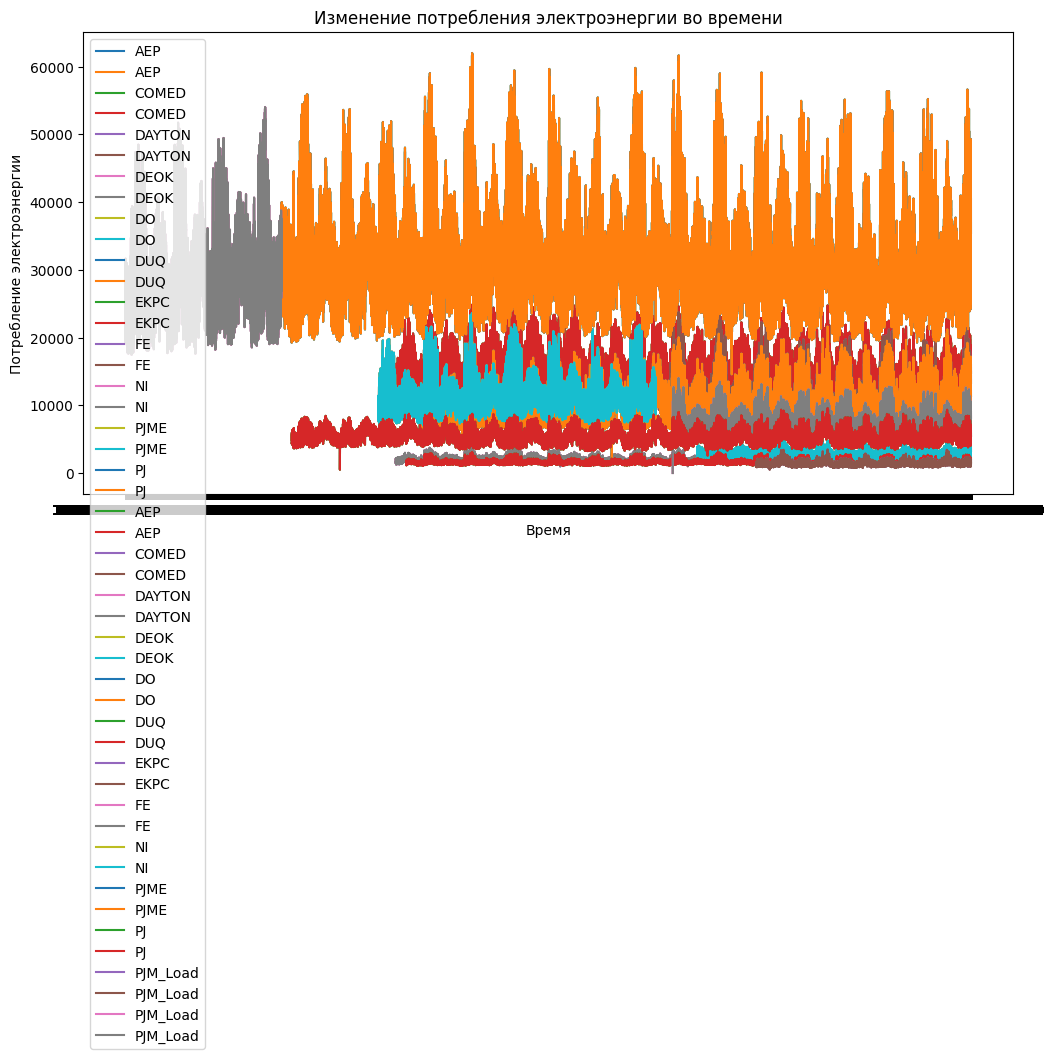

In [30]:
# 4.1 Построение графиков изменений во времени для каждого столбца
plt.figure(figsize=(12, 6))
for column in combined_df.columns:
    if column != 'Datetime':  # Пропускаем столбец 'Datetime'
        plt.plot(combined_df['Datetime'], combined_df[column], label=column)

plt.xlabel('Время')
plt.ylabel('Потребление электроэнергии')
plt.title('Изменение потребления электроэнергии во времени')
plt.legend()
plt.show()


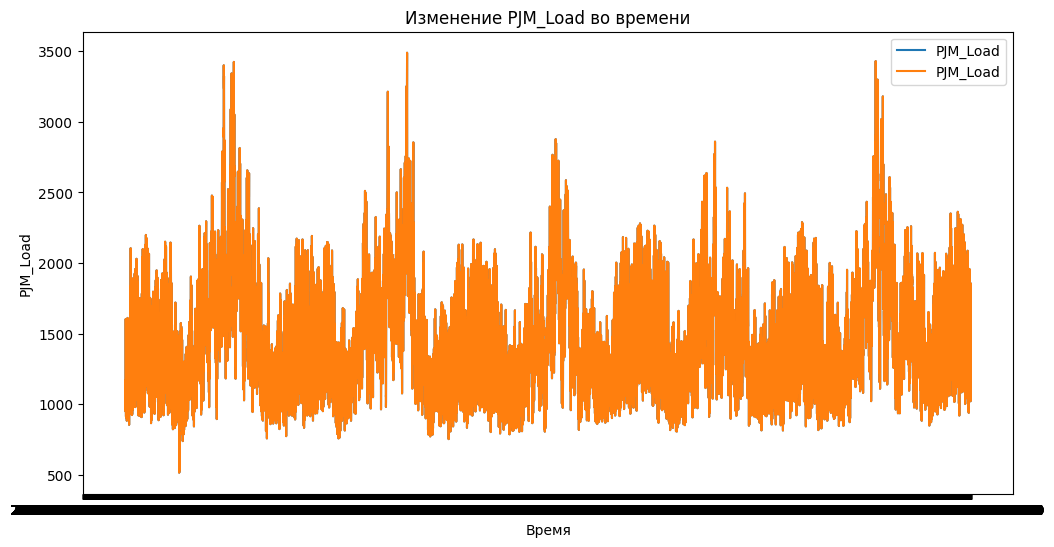

In [31]:
# 4.2 Анализ нужного столбца

plt.figure(figsize=(12, 6))
plt.plot(combined_df['Datetime'], combined_df['EKPC'], label=column)
plt.xlabel('Время')
plt.ylabel(column)
plt.title(f'Изменение {column} во времени')
plt.legend()
plt.show()



Наблюдается ежегодная сезонность и исходя из синусообразного тренда в дальнейшем будет наблюдаться спад

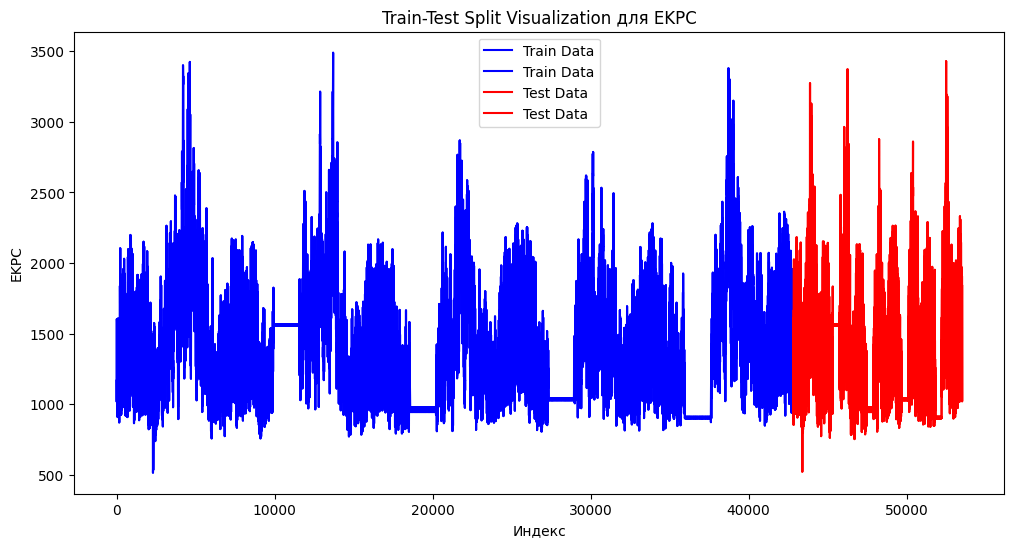

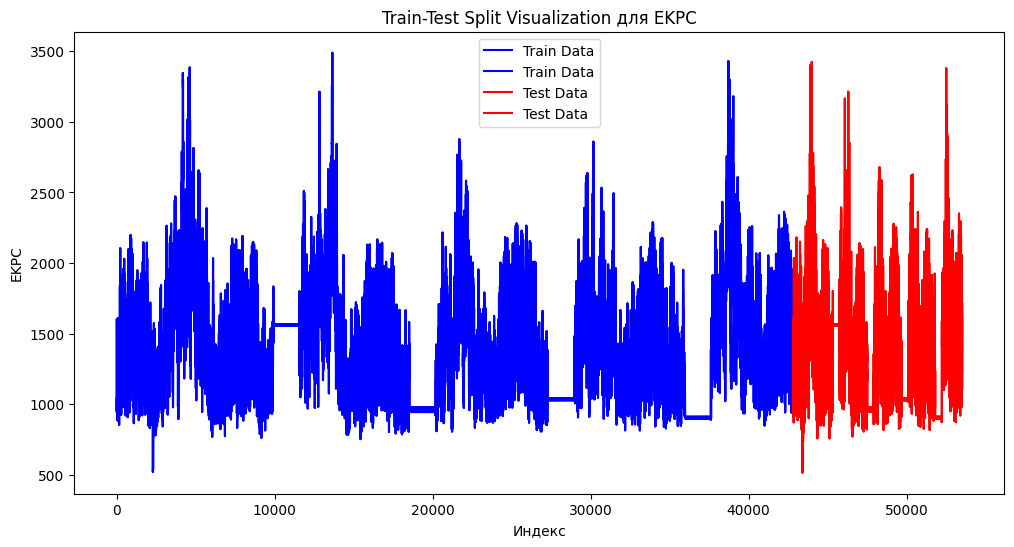

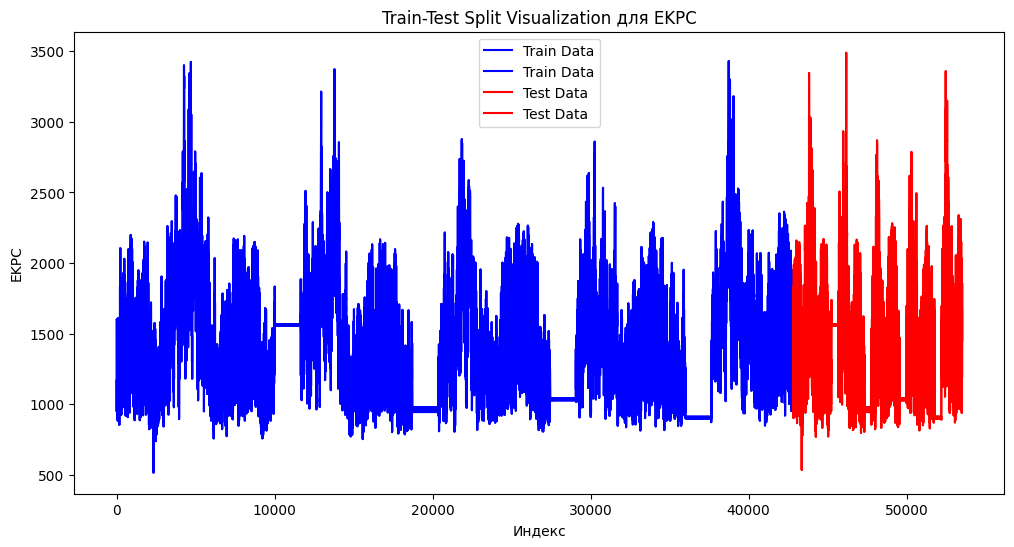

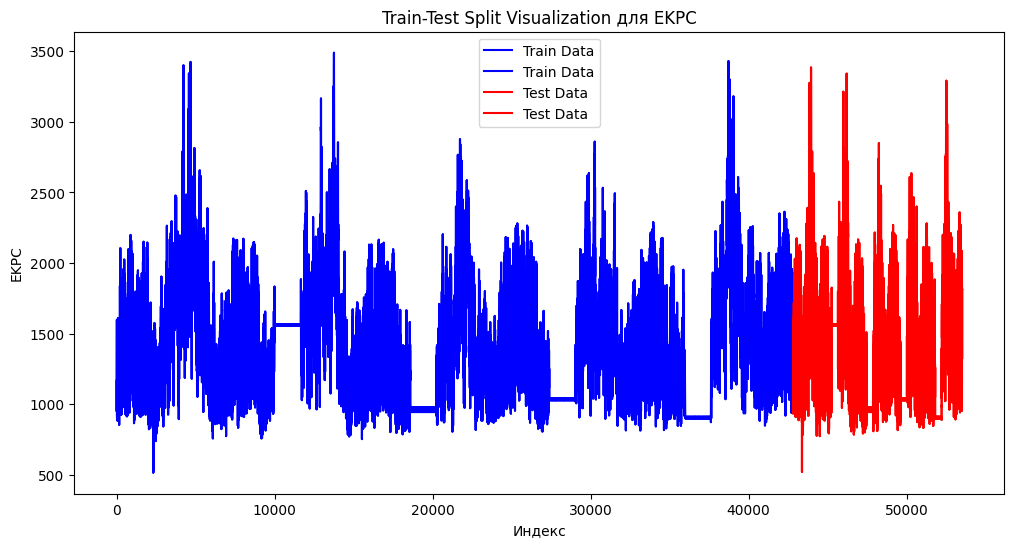

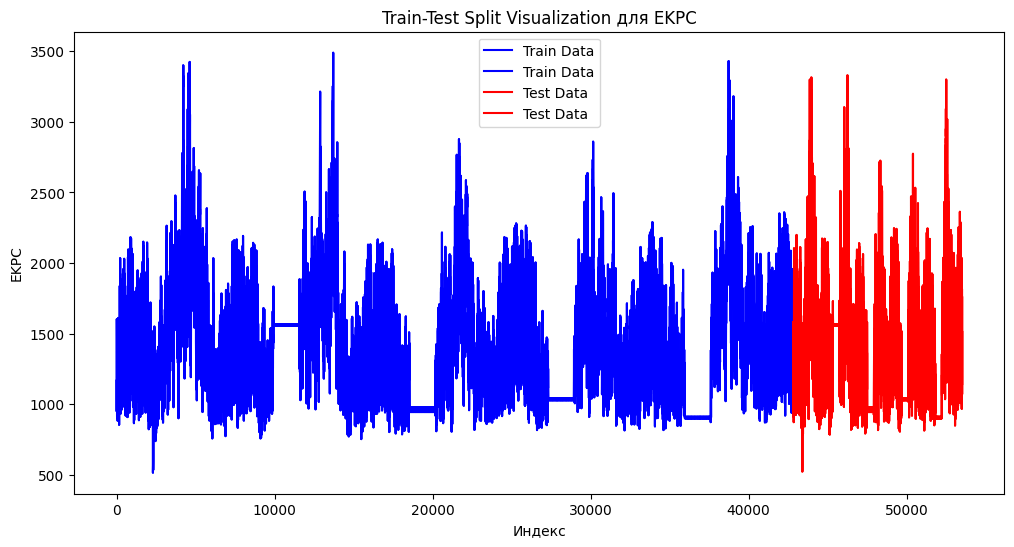

In [32]:
selected_column = 'EKPC' 
ekrs_values = combined_df[selected_column].dropna().values  # Убираем NaN значения

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Визуализация пар train-test
for train_index, test_index in kf.split(ekrs_values):
    train_data = ekrs_values[train_index]
    test_data = ekrs_values[test_index]
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), train_data, color='blue', label='Train Data')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, color='red', label='Test Data')
    plt.xlabel('Индекс')
    plt.ylabel(selected_column)
    plt.title(f'Train-Test Split Visualization для {selected_column}')
    plt.legend()
    plt.show()